In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import warnings
from warnings import filterwarnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [53]:
data = pd.read_csv('hospital_deaths_train.csv')

In [54]:
data.head()

,recordid,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,SICU,DiasABP_first,...,SysABP_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
0,135031,0,69.0,1.0,172.7,63.7,0,0,0,59.0,...,119.0,4.6,NaN,17.2,63.7,7.41,105.0,2580.0,1.0,12.0
1,132988,0,72.0,1.0,NaN,NaN,0,0,0,NaN,...,NaN,NaN,0.23,21.9,NaN,NaN,NaN,NaN,NaN,NaN
2,136292,0,29.0,0.0,NaN,90.0,0,0,0,37.0,...,124.0,NaN,NaN,11.1,106.3,7.40,103.0,2700.0,1.0,14.0
3,133122,0,73.0,1.0,175.3,89.1,0,1,0,58.0,...,148.0,NaN,NaN,18.3,94.2,7.45,144.0,2115.0,0.0,12.0
4,142184,0,74.0,0.0,NaN,78.0,0,0,1,47.0,...,187.0,NaN,NaN,17.7,NaN,7.26,75.0,2280.0,0.0,18.0


In [55]:
feature = ['In-hospital_death','Age', 'Gender', 'Height', 'CCU', 'CSRU', 'SICU', 'MAP_first',
       'GCS_last', 'MAP_last', 'NIDiasABP_last', 'NIMAP_last',
       'DiasABP_lowest', 'MAP_lowest', 'NISysABP_lowest', 'Temp_lowest',
       'Glucose_highest', 'HR_highest', 'MAP_highest', 'MAP_median',
       'FiO2_first', 'HCO3_first', 'HCT_first', 'K_first', 'Lactate_first',
       'Mg_first', 'Na_first', 'PaCO2_first', 'PaO2_first', 'SysABP_first',
       'WBC_first', 'pH_first', 'BUN_last', 'Creatinine_last', 'FiO2_last',
       'HCO3_last', 'HCT_last', 'K_last', 'Lactate_last', 'Mg_last', 'Na_last',
       'PaCO2_last', 'PaO2_last', 'Platelets_last', 'SysABP_last', 'WBC_last',
       'Weight_last', 'pH_last', 'MechVentStartTime', 'MechVentDuration',
       'MechVentLast8Hour', 'UrineOutputSum']

In [56]:
data = data[feature]

In [57]:
missing_percentages1 = (data.isnull().sum() / len(data)) * 100
print(missing_percentages1)
missing_percentages_sorted1 = missing_percentages1.sort_values(ascending=False)
having_NAN = missing_percentages_sorted1.index.to_list()

In-hospital_death     0.000000
Age                   0.000000
Gender                0.092308
Height               46.615385
CCU                   0.000000
CSRU                  0.000000
SICU                  0.000000
MAP_first            30.307692
GCS_last              1.507692
MAP_last             30.307692
NIDiasABP_last       12.707692
NIMAP_last           12.769231
DiasABP_lowest       30.584615
MAP_lowest           30.307692
NISysABP_lowest      12.615385
Temp_lowest           1.507692
Glucose_highest       2.830769
HR_highest            1.476923
MAP_highest          30.307692
MAP_median           30.307692
FiO2_first           31.876923
HCO3_first            1.846154
HCT_first             1.538462
K_first               2.307692
Lactate_first        45.569231
Mg_first              2.553846
Na_first              1.815385
PaCO2_first          24.707692
PaO2_first           24.707692
SysABP_first         30.553846
WBC_first             2.246154
pH_first             24.307692
BUN_last

In [46]:
for feature in having_NAN:
    data[feature]=data.groupby(['In-hospital_death', 'Gender'])[feature].apply(lambda x:x.fillna(x.mean()))

In [47]:
X_train, X_test= train_test_split(data, test_size=0.2, random_state=42)

In [48]:
X_train.to_csv('hospital_deaths_train_08_rt42.csv',index=False)

In [49]:
X_test.to_csv('hospital_deaths_test_02_rt42.csv',index=False)

In [10]:
X = data.drop('In-hospital_death', axis=1)
y = data['In-hospital_death']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
y_train.value_counts()

0    2238
1     359
Name: In-hospital_death, dtype: int64

In [13]:
tl = RandomOverSampler(sampling_strategy='auto')
X_train, y_train = tl.fit_resample(X_train, y_train)

In [14]:
y_train.value_counts()

1    2238
0    2238
Name: In-hospital_death, dtype: int64

In [15]:
std_scale = MinMaxScaler()
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.transform(X_test)

In [16]:
adaboost = AdaBoostClassifier(n_estimators=130,learning_rate = 1, random_state=42)
adaboost.fit(X_train, y_train)
adaboost.score(X_train, y_train), adaboost.score(X_test, y_test)

(0.9857015192135835, 0.9538461538461539)

In [17]:
print(classification_report(y_test, adaboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       559
           1       0.80      0.90      0.85        91

    accuracy                           0.95       650
   macro avg       0.89      0.93      0.91       650
weighted avg       0.96      0.95      0.96       650



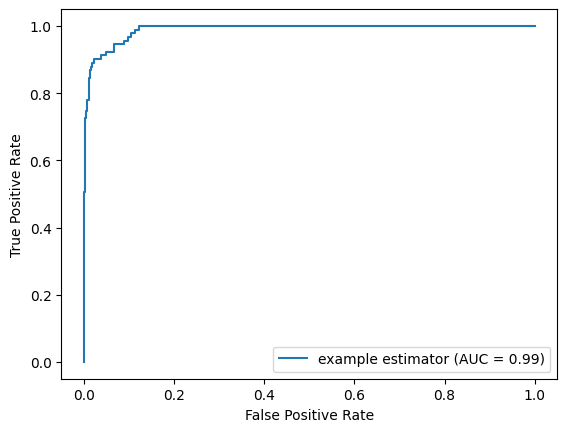

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, adaboost.predict_proba(X_test)[:, 1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

In [19]:
pred = adaboost.predict(X_test)

In [20]:
con = confusion_matrix(y_test, pred)

con

array([[538,  21],
       [  9,  82]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

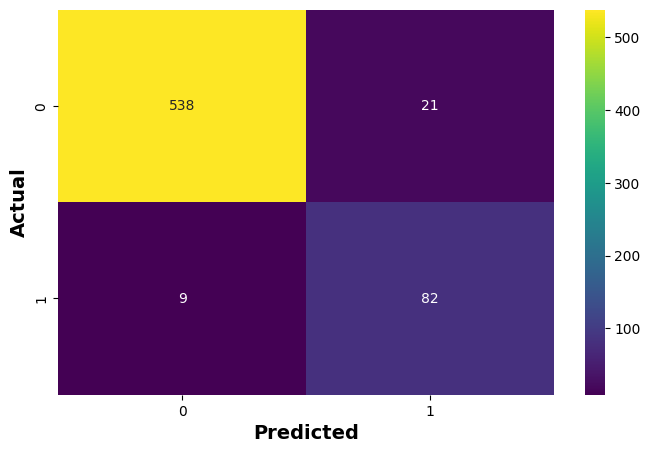

In [21]:
plt.figure(figsize=(8,5))
sns.heatmap(con, annot=True, cmap='viridis', fmt='.0f');
plt.xlabel('Predicted', fontsize=14, weight='bold')
plt.ylabel('Actual', fontsize=14, weight='bold')

In [22]:
import json

ada_prob = adaboost.predict_proba(X_test)[:,1]

# Data to be written
dictionary = {'predict_probas':list(ada_prob), 'threshold':0.5}
# Serializing json
json_object = json.dumps(dictionary, indent=2)
# Writing to sample.json
with open("predictions.json", "w") as outfile:
    outfile.write(json_object)